Laplace Smoothing: 0.1 <> Naive Bayes Accuracy: 79.0 %
Laplace Smoothing: 0.5 <> Naive Bayes Accuracy: 79.2 %
Laplace Smoothing: 1.0 <> Naive Bayes Accuracy: 76.2 %
Laplace Smoothing: 10 <> Naive Bayes Accuracy: 49.4 %
Laplace Smoothing: 100 <> Naive Bayes Accuracy: 22.0 %
Laplace Smoothing: 0.1 <> Naive Bayes Accuracy: 82.19999999999999 %
Laplace Smoothing: 0.5 <> Naive Bayes Accuracy: 82.6 %
Laplace Smoothing: 1.0 <> Naive Bayes Accuracy: 82.6 %
Laplace Smoothing: 10 <> Naive Bayes Accuracy: 82.0 %
Laplace Smoothing: 100 <> Naive Bayes Accuracy: 77.0 %


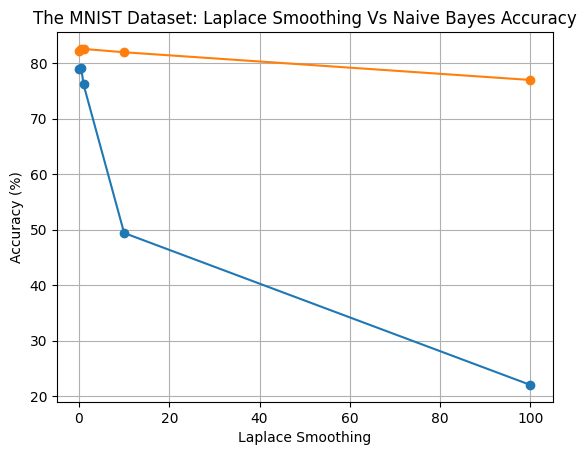

In [1]:
import math
import random
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from mnist import MNIST
from naive_bayes import NaiveBayes



def accuracy_score(true_labels, pred_labels):

    correct = 0
    for true, pred in zip(true_labels, pred_labels):
        if true == pred:
            correct += 1

    return (correct / len(true_labels))*100






"""feature_extraction_1 pixel intensity (0 -> 255)"""
def feature_extraction_1():
    mndata = MNIST('./mnistDataset')
    mndata.gz = True
    X_train, y_train = mndata.load_training()
    mndata.gz = True
    X_test, y_test = mndata.load_testing()

    return X_train[:10000], y_train[:10000], X_test[:500], y_test[:500]


"""feature_extraction_2 pixel on/off (0 | 1)"""
def feature_extraction_2():
    mndata = MNIST('./mnistDataset')
    mndata.gz = True
    X_train, y_train = mndata.load_training()
    mndata.gz = True
    X_test, y_test = mndata.load_testing()

    for row in range(10000):
        for col in range(len(X_train[0])):
            X_train[row][col] = int(bool(int(X_train[row][col])))
    
    for row in range(500):
        for col in range(len(X_test[0])):
            X_test[row][col] = int(bool(int(X_test[row][col])))
    
    return X_train[:10000], y_train[:10000], X_test[:500], y_test[:500]


    


two_extractions = [feature_extraction_1(), feature_extraction_2()]
laplace_smoothings =  [0.1, 0.5, 1.0, 10, 100]


ind = 0
for  train_features, train_labels, test_features, test_labels in two_extractions:
    accuracy_result = []

    ind  += 1
    for smoothing in laplace_smoothings:

        naive_bayes = NaiveBayes(laplace_smoothing=smoothing, total_data=len(train_labels))
        naive_bayes.train(train_features, train_labels)
        naive_bayes_predictions = naive_bayes.test(test_features)
        naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
        print(f"Laplace Smoothing: {smoothing}", "<> Naive Bayes Accuracy:", naive_bayes_accuracy, '%')
        accuracy_result.append(naive_bayes_accuracy)



    plt.plot(laplace_smoothings, accuracy_result, marker='o', label=f'Feature Extraction Method {ind}')


plt.xlabel('Laplace Smoothing')
plt.ylabel('Accuracy (%)')
plt.title('The MNIST Dataset: Laplace Smoothing Vs Naive Bayes Accuracy')
    
plt.grid(True)
plt.show()

    



LOGISTIC REGRESSION >> MNIST DATASET
Learning Rate: 0.0001 Accuracy: 85.39999999999999
Learning Rate: 0.001 Accuracy: 87.4
Learning Rate: 0.01 Accuracy: 86.0
Learning Rate: 0.1 Accuracy: 89.2
Learning Rate: 1.0 Accuracy: 89.2
Learning Rate: 1.5 Accuracy: 89.2


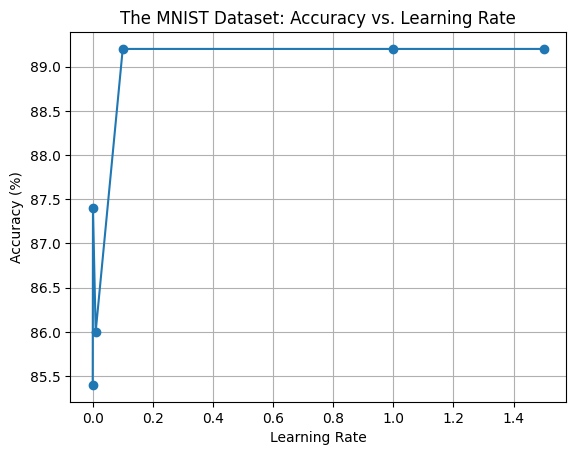

In [2]:
import math
import random
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import time
import numpy as np
from cmath import exp, pi, sqrt
from mnist import MNIST
from logistic_regression import LogisticRegression

def accuracy_score(true_labels, pred_labels):

    correct = 0
    for true, pred in zip(true_labels, pred_labels):
        if true == pred:
            correct += 1

    return (correct / len(true_labels))*100




"""feature_extraction_2 pixel on/off (0 | 1)"""
def feature_extraction_2():
    mndata = MNIST('./mnistDataset')
    mndata.gz = True
    X_train, y_train = mndata.load_training()
    mndata.gz = True
    X_test, y_test = mndata.load_testing()

    for row in range(10000):
        for col in range(len(X_train[0])):
            X_train[row][col] = int(X_train[row][col])
    
    for row in range(500):
        for col in range(len(X_test[0])):
            X_test[row][col] = int(X_test[row][col])
    
    return X_train[:10000], y_train[:10000], X_test[:500], y_test[:500]




train_features, train_labels, test_features, test_labels = feature_extraction_2()

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]
accuracy = []



print('LOGISTIC REGRESSION >> MNIST DATASET')
for rate in learning_rates:

    logistic_regression = LogisticRegression(num_classes=10,learning_rate=rate)
    logistic_regression.train(np.array(train_features), np.array(train_labels))
    logistic_regression_predictions = logistic_regression.test(test_features)
    logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_predictions)
    accuracy.append(logistic_regression_accuracy)
    print(f'Learning Rate: {rate}', f'Accuracy: {logistic_regression_accuracy}')

plt.plot(learning_rates, accuracy, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('The MNIST Dataset: Accuracy vs. Learning Rate')
plt.grid(True)
plt.show()




For feature extraction method 3
Laplace Smoothing: 0.1 <> Naive Bayes Accuracy: 25.0 %
Laplace Smoothing: 0.5 <> Naive Bayes Accuracy: 25.0 %
Laplace Smoothing: 1.0 <> Naive Bayes Accuracy: 25.0 %
Laplace Smoothing: 10 <> Naive Bayes Accuracy: 25.2 %
Laplace Smoothing: 100 <> Naive Bayes Accuracy: 20.599999999999998 %


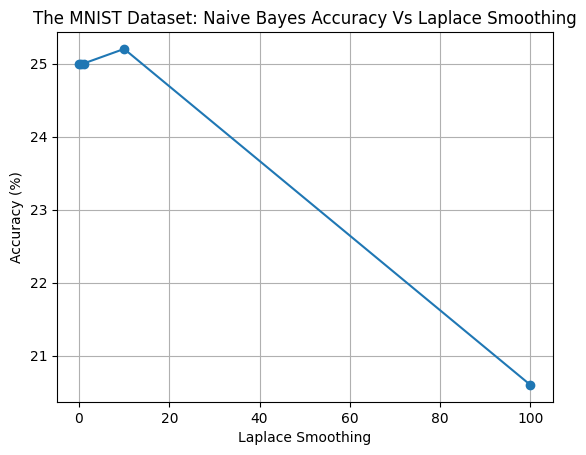

In [1]:
"""
FEATURE EXTRACTION 3
"""

import math
import random
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from naive_bayes import NaiveBayes




def accuracy_score(true_labels, pred_labels):

    correct = 0
    for true, pred in zip(true_labels, pred_labels):
        if true == pred:
            correct += 1

    return (correct / len(true_labels))*100




# load mnist data
from mnist import MNIST
mndata = MNIST('./mnistDataset')
mndata.gz = True
X_train, y_train = mndata.load_training()
mndata.gz = True
X_test, y_test = mndata.load_testing()



"""
feature_extraction_3 number of on pixels in the image
the total number of on pixels in a number might affect which digit it is
"""
def feature_extraction_3(X_train, y_train, X_test, y_test):
    temp_x_train = []
    for row in range(10000):
        count = 0
        for col in range(len(X_train[0])):
            if int(X_train[row][col]):
                count += 1
        
        temp_x_train.append([count])
    
    temp_x_test = []
    for row in range(500):
        count = 0
        for col in range(len(X_test[0])):
            if int(X_test[row][col]):
                count += 1
        
        temp_x_test.append([count])
    
    return temp_x_train[:10000], y_train[:10000], temp_x_test[:500], y_test[:500]


    

laplace_smoothings =  [0.1, 0.5, 1.0, 10, 100]

train_features, train_labels, test_features, test_labels = feature_extraction_3(X_train, y_train, X_test, y_test)
accuracy_result = []

print(f'For feature extraction method 3')
for smoothing in laplace_smoothings:

    naive_bayes = NaiveBayes(laplace_smoothing=smoothing, total_data=len(train_labels))
    naive_bayes.train(train_features, train_labels)
    naive_bayes_predictions = naive_bayes.test(test_features)
    naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
    print(f"Laplace Smoothing: {smoothing}", "<> Naive Bayes Accuracy:", naive_bayes_accuracy, '%')
    accuracy_result.append(naive_bayes_accuracy)



plt.plot(laplace_smoothings, accuracy_result, marker='o')
plt.xlabel('Laplace Smoothing')
plt.ylabel('Accuracy (%)')
plt.title('The MNIST Dataset: Naive Bayes Accuracy Vs Laplace Smoothing')
plt.grid(True)
plt.show()

